In [42]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
%matplotlib inline 

In [43]:
# Loading the datasets
df = pd.read_csv("data/train_valuess.csv")
dft = pd.read_csv("data/test_valuess.csv")
df_tar= pd.read_csv("data/train_labels.csv")

In [44]:
df_tar.head(5)

,row_id,accepted
0,0,1
1,1,0
2,2,1
3,3,1
4,4,1


In [45]:
df.head(5)

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant
0,0,3,1,1,1,70.0,3,18,37,246,...,1,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,False
1,1,1,1,3,1,178.0,3,369,52,299,...,1,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,False
2,2,2,1,3,1,163.0,3,16,10,306,...,1,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,False
3,3,1,1,1,1,155.0,1,305,47,180,...,1,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,True
4,4,1,1,1,1,305.0,3,24,37,20,...,2,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,False


In [46]:
dft.describe()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,...,500000.000000,500000.000000,459859.000000,477520.000000,477518.000000,477547.000000,477483.000000,477426.000000,477450.000000,500000.000000
mean,249999.500000,1.367028,1.047556,2.070192,1.108330,222.954214,2.764926,181.518910,23.771794,144.715824,...,4.787448,1.461534,101.926536,5411.205196,31.631572,69254.074141,91.813397,1426.559815,1884.863422,3719.194494
std,144337.711634,0.690104,0.231133,0.947980,0.324214,669.975457,0.542847,138.262853,15.978295,100.397007,...,1.022982,0.676923,148.003593,2719.506721,26.331363,14826.683469,14.218730,737.048133,914.985938,1840.072583
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,0.317000,17851.000000,6.215000,3.000000,1.000000,1.000000
25%,124999.750000,1.000000,1.000000,1.000000,1.000000,93.000000,3.000000,25.000000,6.000000,57.000000,...,5.000000,1.000000,47.000000,3746.000000,10.705000,59739.000000,88.017000,943.000000,1302.000000,2442.000000
50%,249999.500000,1.000000,1.000000,2.000000,1.000000,162.000000,3.000000,192.000000,26.000000,131.000000,...,5.000000,1.000000,74.000000,4975.000000,22.955000,67514.000000,100.000000,1326.000000,1753.000000,3713.000000
75%,374999.250000,2.000000,1.000000,3.000000,1.000000,266.000000,3.000000,314.000000,37.000000,246.000000,...,5.000000,2.000000,117.000000,6455.000000,45.972000,75414.000000,100.000000,1777.000000,2305.000000,5436.000000
max,499999.000000,4.000000,3.000000,3.000000,3.000000,102074.000000,3.000000,408.000000,52.000000,324.000000,...,7.000000,4.000000,10261.000000,34194.000000,100.000000,125244.000000,100.000000,8754.000000,13609.000000,6508.000000


In [47]:
df.describe()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,...,500000.000000,500000.000000,460052.000000,477535.000000,477534.000000,477560.000000,477486.000000,477435.000000,477470.000000,500000.000000
mean,249999.500000,1.366276,1.047650,2.066810,1.109590,221.753158,2.764722,181.606972,23.726924,144.542062,...,4.786586,1.462374,102.389521,5416.833956,31.617310,69235.603298,91.832624,1427.718282,1886.147065,3720.121344
std,144337.711634,0.690555,0.231404,0.948371,0.326092,590.641648,0.543061,138.464169,15.982768,100.243612,...,1.024927,0.677685,153.534496,2728.144999,26.333938,14810.058791,14.210924,737.559511,914.123744,1838.313175
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,1.000000,14.000000,0.534000,17858.000000,3.981000,4.000000,1.000000,0.000000
25%,124999.750000,1.000000,1.000000,1.000000,1.000000,93.000000,3.000000,25.000000,6.000000,57.000000,...,5.000000,1.000000,47.000000,3744.000000,10.700000,59731.000000,88.067250,944.000000,1301.000000,2442.000000
50%,249999.500000,1.000000,1.000000,2.000000,1.000000,162.000000,3.000000,192.000000,26.000000,131.000000,...,5.000000,1.000000,74.000000,4975.000000,22.901000,67526.000000,100.000000,1327.000000,1753.000000,3731.000000
75%,374999.250000,2.000000,1.000000,3.000000,1.000000,266.000000,3.000000,314.000000,37.000000,246.000000,...,5.000000,2.000000,117.000000,6467.000000,46.020000,75351.000000,100.000000,1780.000000,2309.000000,5436.000000
max,499999.000000,4.000000,3.000000,3.000000,3.000000,100878.000000,3.000000,408.000000,52.000000,324.000000,...,7.000000,4.000000,10139.000000,37097.000000,100.000000,125248.000000,100.000000,8771.000000,13623.000000,6508.000000


In [48]:
# droping the row_id column
df.drop("row_id", axis = 1, inplace =True)

In [49]:
# droping the row_id column
dft.drop("row_id", axis = 1, inplace =True)

In [50]:
# replacing any -1 values with np.nan to deal with it as missing values 
for i in df.columns:
    df[i] = df[i].replace(-1, np.nan)

df.isnull().sum()

loan_type                             0
property_type                         0
loan_purpose                          0
occupancy                             0
loan_amount                           0
preapproval                           0
msa_md                            76982
state_code                        19132
county_code                       20466
applicant_ethnicity                   0
applicant_race                        0
applicant_sex                         0
applicant_income                  39948
population                        22465
minority_population_pct           22466
ffiecmedian_family_income         22440
tract_to_msa_md_income_pct        22514
number_of_owner-occupied_units    22565
number_of_1_to_4_family_units     22530
lender                                0
co_applicant                          0
dtype: int64

In [51]:
# replacing any -1 values with np.nan to deal with it as missing values 
for i in dft.columns:
    dft[i] = dft[i].replace(-1, np.nan)

dft.isnull().sum()

loan_type                             0
property_type                         0
loan_purpose                          0
occupancy                             0
loan_amount                           0
preapproval                           0
msa_md                            76993
state_code                        19120
county_code                       20566
applicant_ethnicity                   0
applicant_race                        0
applicant_sex                         0
applicant_income                  40141
population                        22480
minority_population_pct           22482
ffiecmedian_family_income         22453
tract_to_msa_md_income_pct        22517
number_of_owner-occupied_units    22574
number_of_1_to_4_family_units     22550
lender                                0
co_applicant                          0
dtype: int64

In [52]:
# replacing the boolean values in the co-applicant columns to 0 and 1 integers
le = preprocessing.LabelEncoder()
df["co_applicant"]=le.fit_transform(df["co_applicant"])
df["co_applicant"].unique()

array([0, 1])

In [53]:
# replacing the boolean values in the co-applicant columns to 0 and 1 integers
le = preprocessing.LabelEncoder()
dft["co_applicant"]=le.fit_transform(dft["co_applicant"])
dft["co_applicant"].unique()

array([1, 0])

In [54]:
# replacing the missing values in the categorical columns with 0    
df["msa_md"] = df["msa_md"].fillna(0)
df["state_code"] = df["state_code"].fillna(0)
df["county_code"] = df["county_code"].fillna(0)

In [55]:
# replacing the missing values in the categorical columns with 0    
dft["msa_md"] = dft["msa_md"].fillna(0)
dft["state_code"] = dft["state_code"].fillna(0)
dft["county_code"] = dft["county_code"].fillna(0)

In [56]:
df.isnull().sum()

loan_type                             0
property_type                         0
loan_purpose                          0
occupancy                             0
loan_amount                           0
preapproval                           0
msa_md                                0
state_code                            0
county_code                           0
applicant_ethnicity                   0
applicant_race                        0
applicant_sex                         0
applicant_income                  39948
population                        22465
minority_population_pct           22466
ffiecmedian_family_income         22440
tract_to_msa_md_income_pct        22514
number_of_owner-occupied_units    22565
number_of_1_to_4_family_units     22530
lender                                0
co_applicant                          0
dtype: int64

In [57]:
dft.isnull().sum()

loan_type                             0
property_type                         0
loan_purpose                          0
occupancy                             0
loan_amount                           0
preapproval                           0
msa_md                                0
state_code                            0
county_code                           0
applicant_ethnicity                   0
applicant_race                        0
applicant_sex                         0
applicant_income                  40141
population                        22480
minority_population_pct           22482
ffiecmedian_family_income         22453
tract_to_msa_md_income_pct        22517
number_of_owner-occupied_units    22574
number_of_1_to_4_family_units     22550
lender                                0
co_applicant                          0
dtype: int64

In [58]:
# replacing the numrical columns with the median
df["population"].fillna(df["population"].median(), inplace = True)

df["minority_population_pct"].fillna(df["minority_population_pct"].median(), inplace = True)

df["ffiecmedian_family_income"].fillna(df["ffiecmedian_family_income"].median(), 
                                       inplace = True)

df["number_of_owner-occupied_units"].fillna(df["number_of_owner-occupied_units"].median(), 
                                            inplace = True)

df["tract_to_msa_md_income_pct"].fillna(df["tract_to_msa_md_income_pct"].median(), 
                                        inplace = True)

df["number_of_1_to_4_family_units"].fillna(df["number_of_1_to_4_family_units"].median(),
                                           inplace = True)

In [59]:
# replacing the numrical columns with the median
dft["population"].fillna(dft["population"].median(), inplace = True)

dft["minority_population_pct"].fillna(dft["minority_population_pct"].median(), inplace = True)

dft["ffiecmedian_family_income"].fillna(dft["ffiecmedian_family_income"].median(), 
                                       inplace = True)

dft["number_of_owner-occupied_units"].fillna(dft["number_of_owner-occupied_units"].median(), 
                                            inplace = True)

dft["tract_to_msa_md_income_pct"].fillna(dft["tract_to_msa_md_income_pct"].median(), 
                                        inplace = True)

dft["number_of_1_to_4_family_units"].fillna(dft["number_of_1_to_4_family_units"].median(),
                                           inplace = True)

In [60]:
# Getting the log of the loan amount column to deal with the outliers
df['loan_amount'] = np.log(df['loan_amount'])

In [61]:
# Getting the log of the loan amount column to deal with the outliers
dft['loan_amount'] = np.log(dft['loan_amount'])

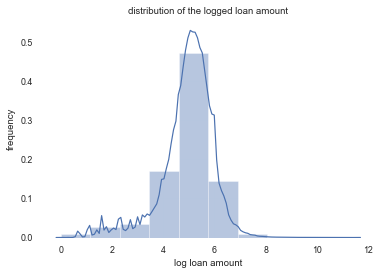

In [62]:
# ploting the logged loan amount column
sns.distplot(df['loan_amount'], bins = 10)
plt.xlabel("log loan amount")
plt.ylabel("frequency")
plt.title("distribution of the logged loan amount")
plt.box(False)
plt.grid(color = "white")
plt.show()

In [63]:
# filling the missing values in the applicant income column and getting logged values to treat the outliers
df["applicant_income"].fillna(df["applicant_income"].median(), inplace = True)
df['applicant_income'] = np.log(df['applicant_income'])

In [64]:
# filling the missing values in the applicant income column and getting logged values to treat the outliers
dft["applicant_income"].fillna(dft["applicant_income"].median(), inplace = True)
dft['applicant_income'] = np.log(dft['applicant_income'])

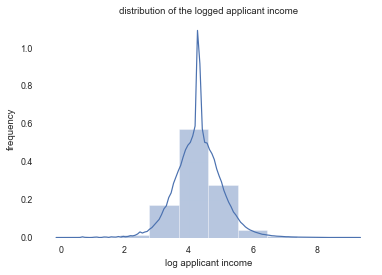

In [65]:
# visualizing the new logged applicant income 
sns.distplot(df['applicant_income'], bins = 10)
plt.xlabel("log applicant income")
plt.ylabel("frequency")
plt.title("distribution of the logged applicant income")
plt.box(False)
plt.grid(color = "white")
plt.show()

In [66]:
df.head(5).T

,0,1,2,3,4
loan_type,3.000000,1.000000,2.000000,1.000000,1.000000
property_type,1.000000,1.000000,1.000000,1.000000,1.000000
loan_purpose,1.000000,3.000000,3.000000,1.000000,1.000000
occupancy,1.000000,1.000000,1.000000,1.000000,1.000000
loan_amount,4.248495,5.181784,5.093750,5.043425,5.720312
preapproval,3.000000,3.000000,3.000000,1.000000,3.000000
msa_md,18.000000,369.000000,16.000000,305.000000,24.000000
state_code,37.000000,52.000000,10.000000,47.000000,37.000000
county_code,246.000000,299.000000,306.000000,180.000000,20.000000
applicant_ethnicity,2.000000,1.000000,2.000000,2.000000,2.000000


In [67]:
dft.head(5).T

,0,1,2,3,4
loan_type,2.000000,1.000000,1.000000,2.000000,2.000000
property_type,1.000000,1.000000,1.000000,1.000000,1.000000
loan_purpose,3.000000,1.000000,1.000000,1.000000,1.000000
occupancy,1.000000,1.000000,1.000000,1.000000,1.000000
loan_amount,4.744932,5.529429,5.598422,5.187386,3.583519
preapproval,3.000000,2.000000,1.000000,2.000000,2.000000
msa_md,101.000000,87.000000,0.000000,376.000000,254.000000
state_code,16.000000,20.000000,0.000000,20.000000,48.000000
county_code,276.000000,68.000000,0.000000,11.000000,156.000000
applicant_ethnicity,2.000000,2.000000,2.000000,2.000000,3.000000


In [68]:
# getting a better sense of the corrlation between the different features and the target column 
df.apply(lambda x: x.corr(df_tar.accepted))

loan_type                         0.018589
property_type                    -0.080603
loan_purpose                     -0.131595
occupancy                         0.022043
loan_amount                       0.169416
preapproval                       0.017209
msa_md                            0.080046
state_code                        0.088597
county_code                       0.052264
applicant_ethnicity               0.009777
applicant_race                    0.045361
applicant_sex                    -0.038391
applicant_income                  0.178756
population                        0.025540
minority_population_pct          -0.076546
ffiecmedian_family_income         0.070197
tract_to_msa_md_income_pct        0.064809
number_of_owner-occupied_units    0.040934
number_of_1_to_4_family_units     0.012038
lender                            0.008494
co_applicant                      0.101116
dtype: float64

In [69]:
# getting a better sense of the corrlation between the columns and each others
df.corr()

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,...,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant
loan_type,1.000000,-0.065214,-0.121296,-0.158964,0.096810,-0.133156,-0.024350,-0.046627,-0.016259,-0.050118,...,-0.072372,-0.135373,0.040495,0.012583,-0.069101,-0.002291,0.033843,0.050889,-0.027408,-0.025502
property_type,-0.065214,1.000000,-0.114663,0.156139,-0.092098,0.046035,-0.075847,-0.017681,-0.007411,0.131192,...,0.106785,-0.133746,-0.028243,-0.019480,-0.089631,-0.053266,-0.029751,0.003194,-0.035769,-0.029625
loan_purpose,-0.121296,-0.114663,1.000000,0.002154,0.021272,0.487352,0.072274,0.116167,0.057763,0.023305,...,0.014322,0.037029,-0.005286,0.056949,0.060785,-0.022783,-0.009738,-0.016767,0.051664,0.013419
occupancy,-0.158964,0.156139,0.002154,1.000000,0.006548,0.043719,-0.012269,0.011175,0.008095,0.159449,...,0.132245,0.135599,-0.051035,0.049574,-0.024807,-0.101758,-0.087846,-0.019253,-0.001298,-0.016899
loan_amount,0.096810,-0.092098,0.021272,0.006548,1.000000,-0.084002,0.069441,0.096504,-0.007240,0.058661,...,-0.050456,0.473655,0.052439,-0.025696,0.270848,0.192670,0.039886,-0.026319,0.042993,0.149988
preapproval,-0.133156,0.046035,0.487352,0.043719,-0.084002,1.000000,0.130022,0.178322,0.157662,0.016996,...,0.019185,0.020631,0.002174,0.064595,0.017152,-0.075085,-0.006440,0.001400,0.000559,0.013920
msa_md,-0.024350,-0.075847,0.072274,-0.012269,0.069441,0.130022,1.000000,0.143800,0.159649,-0.011815,...,0.004969,0.075686,0.072105,0.097610,0.263391,-0.055407,0.047922,-0.030940,0.013482,-0.004502
state_code,-0.046627,-0.017681,0.116167,0.011175,0.096504,0.178322,0.143800,1.000000,0.016186,-0.001454,...,-0.001747,0.059770,-0.076633,0.033018,0.197729,-0.059256,-0.099084,-0.119953,0.020445,0.029680
county_code,-0.016259,-0.007411,0.057763,0.008095,-0.007240,0.157662,0.159649,0.016186,1.000000,0.005655,...,-0.000465,0.019682,0.076927,0.036641,0.053440,-0.047254,0.055712,0.059162,0.002760,0.003698
applicant_ethnicity,-0.050118,0.131192,0.023305,0.159449,0.058661,0.016996,-0.011815,-0.001454,0.005655,1.000000,...,0.497732,0.072210,-0.038283,-0.172978,0.080283,0.042581,0.010559,0.004021,0.009411,-0.124085


Text(0.5, 1, 'Corrlation between number_of_1_to_4_family_units and number_of_owner-occupied_units')

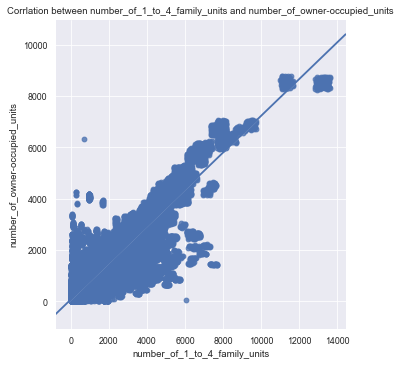

In [70]:
# plot the corrlation between two columns 
sns.set()
sns.set_context("paper")
sns.lmplot(x ="number_of_1_to_4_family_units", y = "number_of_owner-occupied_units", data=df) 
plt.title("Corrlation between number_of_1_to_4_family_units and number_of_owner-occupied_units")

In [71]:
x = df
y = df_tar["accepted"]
x_train,x_test,y_train,y_test = train_test_split(x , y , test_size= 0.2 , random_state=1234)

In [72]:
# identifying the categorical columns for the model
cat_feat = [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 19, 20]

In [73]:
# Building the model
model = CatBoostClassifier(eval_metric='Accuracy', use_best_model=True, random_seed=42, 
                           learning_rate=0.24, silent=True, cat_features=cat_feat, depth = 6)
model.fit(x_train,y_train,eval_set=(x_test,y_test))

In [74]:
# predicting the test data and evaluating it 
yhatt = model.predict(x_test)
yhat = model.predict(dft)
print("accuracy of the model=", accuracy_score(y_test, yhatt)) 
print("class", classification_report(y_test, yhatt))

accuracy of the model= 0.73118
class               precision    recall  f1-score   support

           0       0.76      0.68      0.72     49811
           1       0.71      0.78      0.74     50189

    accuracy                           0.73    100000
   macro avg       0.73      0.73      0.73    100000
weighted avg       0.73      0.73      0.73    100000



In [75]:
# building a confusion matrix for the evaluation and slicing it into four pieces
confusion = confusion_matrix(y_test, yhatt)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[33882 15929]
 [10953 39236]]


In [76]:
len(yhat)

500000

In [78]:
#Save this cleaned training data to a csv
import numpy as np
np.savetxt("res.csv", np.dstack((np.arange(1, yhat.size+1),yhat))[0],"%d,%d",header="row_id,accepted")


In [79]:

# Loading the datasets
response = pd.read_csv("res.csv")

response = response.rename(columns={'# row_id': 'row_id', 'accepted': 'accepted'})



In [83]:
response.describe()

,row_id,accepted
count,500000.000000,500000.000000
mean,250000.500000,0.549064
std,144337.711634,0.497587
min,1.000000,0.000000
25%,125000.750000,0.000000
50%,250000.500000,1.000000
75%,375000.250000,1.000000
max,500000.000000,1.000000


In [81]:
#Save this cleaned training data to a csv

response.to_csv('results/submirrion.csv', index = False, header = True)

In [84]:
reso = pd.read_csv("results/submirrion.csv")
reso.describe()

,row_id,accepted
count,500000.000000,500000.000000
mean,250000.500000,0.549064
std,144337.711634,0.497587
min,1.000000,0.000000
25%,125000.750000,0.000000
50%,250000.500000,1.000000
75%,375000.250000,1.000000
max,500000.000000,1.000000


In [85]:
len(reso)

500000